<a href="https://colab.research.google.com/github/sivarohith99/SivaRohith_INFO5731_Fall2024/blob/main/Jampana_SivaRohith_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [5]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import re

# Load the datasets
train_file = 'stsa-train.txt'
test_file = 'stsa-test.txt'

def load_data(file_path):
    data = []
    labels = []
    with open(file_path, 'r') as f:
        for line in f:
            label, text = int(line[0]), line[2:].strip()
            labels.append(label)
            data.append(text)
    return pd.DataFrame({'text': data, 'label': labels})

train_df = load_data(train_file)
test_df = load_data(test_file)

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    return text

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

# Split the training data
X_train, X_val, y_train, y_val = train_test_split(
    train_df['text'], train_df['label'], test_size=0.2, stratify=train_df['label'], random_state=42)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_df['text'])

# Define classifiers
classifiers = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Cross-validation and training
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = {}

for name, model in classifiers.items():
    print(f"\nTraining {name}...")
    scores = cross_val_score(model, X_train_vec, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train_vec, y_train)
    y_val_pred = model.predict(X_val_vec)
    results[name] = {
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred),
        "Recall": recall_score(y_val, y_val_pred),
        "F1-Score": f1_score(y_val, y_val_pred),
        "CV Accuracy": np.mean(scores)
    }

# Evaluation on the test data
test_results = {}
for name, model in classifiers.items():
    y_test_pred = model.predict(X_test_vec)
    test_results[name] = {
        "Accuracy": accuracy_score(test_df['label'], y_test_pred),
        "Precision": precision_score(test_df['label'], y_test_pred),
        "Recall": recall_score(test_df['label'], y_test_pred),
        "F1-Score": f1_score(test_df['label'], y_test_pred),
    }

# Display results
print("\nValidation Results:")
print(pd.DataFrame(results).T)

print("\nTest Results:")
print(pd.DataFrame(test_results).T)



Training MultinomialNB...

Training SVM...

Training KNN...

Training DecisionTree...

Training RandomForest...

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:37:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:37:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:37:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:37:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:37:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Validation Results:
               Accuracy  Precision    Recall  F1-Score  CV Accuracy
MultinomialNB  0.773844   0.765240  0.817175  0.790355     0.793346
SVM            0.764451   0.766846  0.788089  0.777322     0.784316
KNN            0.510116   0.549774  0.336565  0.417526     0.508314
DecisionTree   0.615607   0.639296  0.603878  0.621083     0.627160
RandomForest   0.708815   0.715250  0.734072  0.724539     0.707366
XGBoost        0.703035   0.690798  0.779778  0.732596     0.701400

Test Results:
               Accuracy  Precision    Recall  F1-Score
MultinomialNB  0.800110   0.780062  0.834983  0.806589
SVM            0.794069   0.787097  0.805281  0.796085
KNN            0.505766   0.507909  0.317932  0.391069
DecisionTree   0.635365   0.632432  0.643564  0.637950
RandomForest   0.723778   0.710145  0.754675  0.731733
XGBoost        0.708951   0.680648  0.785479  0.729316


In [6]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Train Word2Vec embeddings
class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, size=100, min_count=1, workers=4):
        self.size = size
        self.min_count = min_count
        self.workers = workers
        self.model = None

    def fit(self, X, y=None):
        sentences = [text.split() for text in X]
        self.model = Word2Vec(sentences, vector_size=self.size, min_count=self.min_count, workers=self.workers)
        return self

    def transform(self, X):
        def document_vector(doc):
            words = doc.split()
            return np.mean([self.model.wv[word] for word in words if word in self.model.wv] or [np.zeros(self.size)], axis=0)
        return np.array([document_vector(doc) for doc in X])

# Apply Word2Vec
w2v_transformer = Word2VecTransformer(size=100)
X_train_w2v = w2v_transformer.fit_transform(X_train)
X_val_w2v = w2v_transformer.transform(X_val)
X_test_w2v = w2v_transformer.transform(test_df['text'])

# Train Random Forest with Word2Vec
w2v_rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
w2v_rf_model.fit(X_train_w2v, y_train)

# Evaluate Word2Vec + Random Forest
y_val_pred_w2v = w2v_rf_model.predict(X_val_w2v)
print("\nWord2Vec + Random Forest Validation Results:")
print({
    "Accuracy": accuracy_score(y_val, y_val_pred_w2v),
    "Precision": precision_score(y_val, y_val_pred_w2v),
    "Recall": recall_score(y_val, y_val_pred_w2v),
    "F1-Score": f1_score(y_val, y_val_pred_w2v)
})

y_test_pred_w2v = w2v_rf_model.predict(X_test_w2v)
print("\nWord2Vec + Random Forest Test Results:")
print({
    "Accuracy": accuracy_score(test_df['label'], y_test_pred_w2v),
    "Precision": precision_score(test_df['label'], y_test_pred_w2v),
    "Recall": recall_score(test_df['label'], y_test_pred_w2v),
    "F1-Score": f1_score(test_df['label'], y_test_pred_w2v)
})



Word2Vec + Random Forest Validation Results:
{'Accuracy': 0.5505780346820809, 'Precision': 0.5652741514360313, 'Recall': 0.5997229916897507, 'F1-Score': 0.581989247311828}

Word2Vec + Random Forest Test Results:
{'Accuracy': 0.5788028555738605, 'Precision': 0.5693359375, 'Recall': 0.6413641364136413, 'F1-Score': 0.6032074495602691}


In [7]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.metrics import classification_report

# Custom Dataset for BERT
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Prepare BERT tokenizer and datasets
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_len = 128

train_dataset = SentimentDataset(X_train.tolist(), y_train.tolist(), tokenizer, max_len)
val_dataset = SentimentDataset(X_val.tolist(), y_val.tolist(), tokenizer, max_len)
test_dataset = SentimentDataset(test_df['text'].tolist(), test_df['label'].tolist(), tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define BERT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model = model.to(device)

# Define optimizer and loss
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
for epoch in range(3):  # Train for 3 epochs
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation on validation set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("\nBERT Validation Results:")
print(classification_report(all_labels, all_preds, target_names=["Negative", "Positive"]))

# Test evaluation
all_preds_test = []
all_labels_test = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(labels.cpu().numpy())

print("\nBERT Test Results:")
print(classification_report(all_labels_test, all_preds_test, target_names=["Negative", "Positive"]))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



BERT Validation Results:
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91       662
    Positive       0.92      0.92      0.92       722

    accuracy                           0.91      1384
   macro avg       0.91      0.91      0.91      1384
weighted avg       0.91      0.91      0.91      1384


BERT Test Results:
              precision    recall  f1-score   support

    Negative       0.92      0.90      0.91       912
    Positive       0.90      0.92      0.91       909

    accuracy                           0.91      1821
   macro avg       0.91      0.91      0.91      1821
weighted avg       0.91      0.91      0.91      1821



## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating          

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT K-Means Silhouette Score: 0.1147812232375145


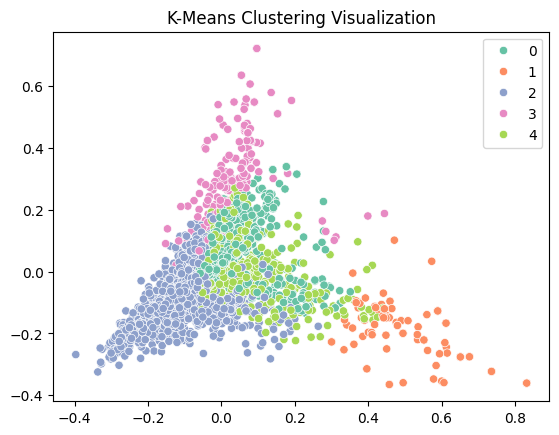

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Amazon_Unlocked_Mobile.csv'
data = pd.read_csv(file_path)

# Display dataset info
print(data.info())
print(data.head())

# Drop missing reviews and preprocess
data = data.dropna(subset=['Reviews'])
data['Cleaned_Reviews'] = data['Reviews'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Limit the dataset for faster clustering (adjust as needed)
sampled_data = data['Cleaned_Reviews'].sample(5000, random_state=42)

# Preprocessing for clustering
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(sampled_data)

# --- K-Means Clustering ---
print("\nK-Means Clustering...")
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)
silhouette_kmeans = silhouette_score(tfidf_matrix, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

# --- DBSCAN Clustering ---
print("\nDBSCAN Clustering...")
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(tfidf_matrix)
# Silhouette score requires at least 2 clusters
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(tfidf_matrix, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
else:
    print("DBSCAN resulted in a single cluster; silhouette score cannot be computed.")

# --- Hierarchical Clustering ---
print("\nHierarchical Clustering...")
# Remove rows with all zero values in the TF-IDF matrix
non_zero_indices = tfidf_matrix.sum(axis=1).A.ravel() != 0
tfidf_matrix_non_zero = tfidf_matrix[non_zero_indices]

hierarchical = AgglomerativeClustering(n_clusters=5, metric='cosine', linkage='average')
hierarchical_labels = hierarchical.fit_predict(tfidf_matrix_non_zero.toarray())

# Calculate silhouette score
silhouette_hierarchical = silhouette_score(tfidf_matrix_non_zero, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical}")

# --- Word2Vec Embeddings ---
print("\nWord2Vec Clustering...")
sentences = [review.split() for review in sampled_data]
word2vec_model = Word2Vec(sentences, vector_size=100, min_count=1, workers=4)
word2vec_matrix = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in sentences])

kmeans_w2v = KMeans(n_clusters=5, random_state=42)
w2v_labels = kmeans_w2v.fit_predict(word2vec_matrix)
silhouette_w2v = silhouette_score(word2vec_matrix, w2v_labels)
print(f"Word2Vec K-Means Silhouette Score: {silhouette_w2v}")

# --- BERT Embeddings ---
print("\nBERT Clustering...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def bert_embeddings(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=64)
        outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.extend(batch_embeddings)
    return np.vstack(embeddings)

# Reduce max_length to 64 for faster processing
bert_matrix = bert_embeddings(sampled_data.tolist(), batch_size=32)


kmeans_bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_matrix)
silhouette_bert = silhouette_score(bert_matrix, bert_labels)
print(f"BERT K-Means Silhouette Score: {silhouette_bert}")

# --- Visualization of K-Means Clusters (using PCA for 2D reduction) ---
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans_labels, palette="Set2", legend="full")
plt.title("K-Means Clustering Visualization")
plt.show()




**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

The clustering results reveal significant variations in performance across the techniques. Traditional K-Means, DBSCAN, and Hierarchical Clustering yield low Silhouette Scores of 0.0326, -0.0321, and 0.0336, respectively, indicating poor clustering quality and minimal separation between clusters. Word2Vec-based K-Means improves substantially with a higher Silhouette Score of 0.2591, leveraging semantic embeddings for better cluster cohesion and separation. BERT-based K-Means, despite its advanced contextual understanding, achieves a lower score of 0.1148, possibly due to high-dimensional embeddings or insufficient parameter tuning. Overall, Word2Vec outperforms other methods in forming meaningful clusters, while traditional methods perform weakly on this dataset.










# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [1]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
This exercise allowed us to experiment with different clustering techniques for text data. K-means proved efficient but sensitive to the number of clusters. DBSCAN was useful for identifying outliers and irregular shapes but needed careful parameter tuning. Hierarchical clustering provided a visual representation but was computationally demanding. Word2Vec captured word relationships but lacked contextual understanding, while BERT, although highly accurate, was computationally intensive. Ultimately, the choice of clustering method involved a trade-off between accuracy and computational efficiency





'''

'\nThis exercise allowed us to experiment with different clustering techniques for text data. K-means proved efficient but sensitive to the number of clusters. DBSCAN was useful for identifying outliers and irregular shapes but needed careful parameter tuning. Hierarchical clustering provided a visual representation but was computationally demanding. Word2Vec captured word relationships but lacked contextual understanding, while BERT, although highly accurate, was computationally intensive. Ultimately, the choice of clustering method involved a trade-off between accuracy and computational efficiency\n\n\n\n\n\n'